<a href="https://colab.research.google.com/github/Brandonj171/Brandonj171/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 3**

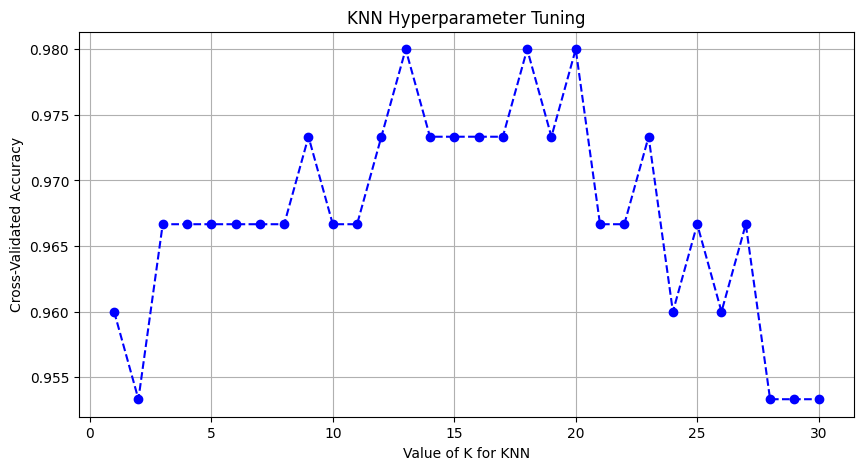

Optimal k based on cross-validation: 13
GridSearchCV Optimal k: 13


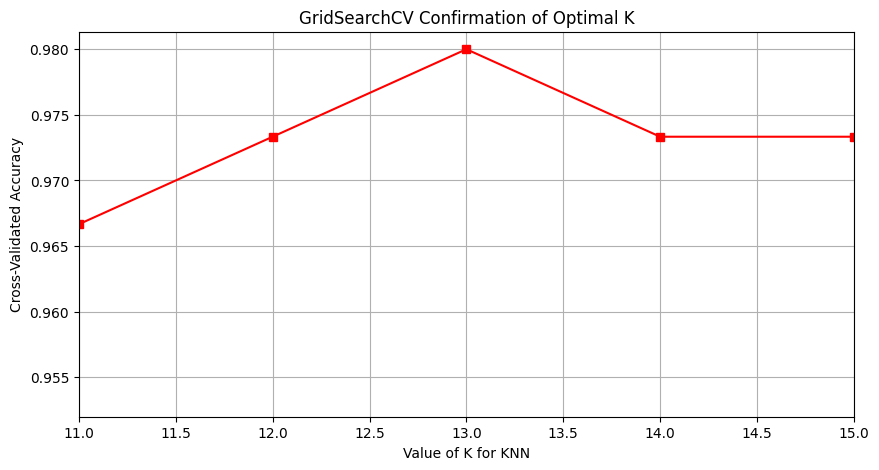

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

iris = load_iris()
X, y = iris.data, iris.target


k_range = range(1, 31)
mean_scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    mean_scores.append(np.mean(scores))


plt.figure(figsize=(10, 5))
plt.plot(k_range, mean_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.grid()
plt.savefig('knn-1.jpg')
plt.show()


optimal_k = k_range[np.argmax(mean_scores)]
print(f"Optimal k based on cross-validation: {optimal_k}")

param_grid = {'n_neighbors': k_range}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid_search.fit(X, y)

print(f"GridSearchCV Optimal k: {grid_search.best_params_['n_neighbors']}")


plt.figure(figsize=(10, 5))
plt.plot(k_range, mean_scores, marker='s', linestyle='-', color='r')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('GridSearchCV Confirmation of Optimal K')
plt.xlim(11.0, 15.0)
plt.grid()
plt.savefig('knn2-1.jpg')
plt.show()
